In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

##CROPPING IMAGE

Fungsi Pada Pre Processing

In [ ]:
#mendeteksi Path
def pathProcessing (path):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif']  # Add more extensions if needed
    image_paths = []

    for ext in image_extensions:
        image_paths.extend(glob.glob(os.path.join(path, ext)))

    return image_paths

In [ ]:
#Membaca Image
def readImage (paths):
    images=[]

    for path in paths:
        image= cv2.imread(path)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image at path: {path}")

    return images

In [ ]:
#membuat gambar menjadi grayscale
def grayImages( images):
    grayed=[]
    numero=0
    for image in images:
        if (numero == 0):
          cv2_imshow(image)
        numero+=1
        gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        grayed.append(gray)

    return grayed

In [ ]:
#untuk mengurangi noise pada gambar
def gaussianBlur(images):
    blurredImages=[]
    numero=0
    for image in images:
        if (numero == 0):
          cv2_imshow(image)
        numero+=1
        kernel_size = (5, 5)
        sigma_x = 9
        blurredImage = cv2.GaussianBlur(image, kernel_size, sigma_x)
        blurredImages.append(blurredImage)

    return blurredImages


In [ ]:
#mendeteksi tepi menggunakan canny
def cannyEdgeDetect(images,th1,th2):
    edgedImages = []
    numero=0
    for image in images:
        if (numero == 0):
          cv2_imshow(image)
        numero+=1
        edges = cv2.Canny(image,th1, th2)
        edgedImages.append(edges)

    return edgedImages

In [ ]:
#melakukan morfologi opening untuk menyambung garis yang putus
def opening(images):
    opened=[]
    numero=0
    for image in images:
        if (numero == 0):
          cv2_imshow(image)
        numero+=1
        kernel = np.ones((5, 5), np.uint8)
        opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

        opened.append(opening)

    return opened

In [ ]:
#Memperbesar garis
def dilation(images):
    sharpenedImages = []
    kernel = np.ones((5,5))
    for image in images:


      dilate = cv2.dilate(image, kernel, 2)

      sharpenedImages.append(dilate)
    return sharpenedImages

In [ ]:
#mendeteksi kuntur dan memotong garis terbesar
def contour(pureImages, images):
    contourr = []
    number = 0
    for image in images:
        contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        img_with_contours = np.copy(pureImages[number])


        mx = (0,0,0,0)
        mx_area = 0

        for cont in contours:
            x,y,w,h = cv2.boundingRect(cont)
            area = w*h
            if area > mx_area:
                mx = x,y,w,h
                mx_area = area

        x,y,w,h = mx
        croped=img_with_contours[y:y+h,x:x+w]

        contourr.append(croped)

        number += 1

    return contourr

In [ ]:
def resize_image(image, size=(600, 600)):
    return cv2.resize(image, size)

In [ ]:
def displayImages(images, titles):

    num_images = len(images)

    # Create subplots based on the number of images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        # Resize the image to 200x200 pixels
        resized_image = resize_image(images[i], size=(200, 200))

        # If the image is in grayscale, use cmap='gray'
        cmap = 'gray' if len(resized_image.shape) == 2 else None

        axes[i].imshow(resized_image, cmap=cmap)
        axes[i].set_title(titles[i])
        axes[i].axis('off')

    plt.show()


PreProcessing Image

##MAIN CROPPING

In [ ]:
def MainCropping(path):
    #path
    processed= pathProcessing(path)

    #importImage
    pureImages=readImage(processed)

    #mengcopy gambar Aseli
    processedImage=pureImages

    #mengubah ke abu abu
    grayed=grayImages(processedImage)

    #melakukan blur
    blured=gaussianBlur(grayed)

    #mendeteksi tepi
    canny=cannyEdgeDetect(blured,30,50)

    #memperbesar garis tepo
    dilasi=dilation(canny)

    #meyambung garis tepi
    opens=opening(dilasi)
    opens=opening(opens)

    #membuat kuntur dan melakukan cropping pada kuntur terbesar
    kuntur=contour(pureImages,opens)

    images_to_display=[]
    titles=[]
    num=1
    for image in kuntur:
      images_to_display.append(image)
      titles.append(str(num))
      num += 1

    displayImages(images_to_display,titles)
    return kuntur

In [ ]:
Cropped=MainCropping('/content/drive/MyDrive/Kelompok 5')

In [ ]:
imagi= cv2.imread('/content/drive/MyDrive/Kelompok 5/agira.png')
Cropped.append(imagi)

output_path = '/content/drive/MyDrive/Export/'

# Pastikan path output ada atau buat jika belum ada
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Simpan setiap gambar dalam bentuk file terpisah
for i, image in enumerate(Cropped):
    filename = f'image_{i+1}.jpg'  # Ganti dengan nama file yang sesuai
    filepath = os.path.join(output_path, filename)
    cv2.imwrite(filepath, image)

MACIN LEARNING

##MODEL



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

In [ ]:
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [ ]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

In [ ]:
np.unique(digits_labels)

In [ ]:
np.unique(alphabet_labels)

In [ ]:
alphabet_labels += 10

In [ ]:
np.unique(alphabet_labels)

In [ ]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
data = np.array(data, dtype = 'float32')

In [ ]:
data /= 255.0

In [ ]:
# Check range value of data
data[0].min(), data[0].max()

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
classes_total = labels.sum(axis = 0)
classes_total

In [ ]:
classes_total.max()

In [ ]:
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# output
network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
network.summary()

In [ ]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

In [ ]:
import joblib

joblib.dump(name_labels, "labels.pkl")

In [ ]:
a = joblib.load("labels.pkl")
print(a)

In [ ]:
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [ ]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data=(X_test, y_test),
                      steps_per_epoch=len(X_train) // batch_size, epochs=epochs,
                      class_weight=classes_weights, verbose=1, callbacks=[checkpointer])


In [ ]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

In [ ]:
name_labels[np.argmax(predictions[10])]

In [ ]:
np.argmax(y_test[10]) == np.argmax(predictions[10])

In [ ]:
network.evaluate(X_test, y_test)

In [ ]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

In [ ]:
network.save('network', save_format= 'h5')

##MODEL 2

In [ ]:
import pandas as pd
import zipfile, imutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from sklearn.metrics import classification_report
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

In [ ]:
!mkdir -p /root/.kaggle/
!mv kaggle.json /root/.kaggle/

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

100% 185M/185M [00:09<00:00, 23.3MB/s]
100% 185M/185M [00:09<00:00, 19.7MB/s]


In [ ]:
with zipfile.ZipFile('/content/az-handwritten-alphabets-in-csv-format.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [ ]:
dataset_az = pd.read_csv('/content/dataset/A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 17.0')

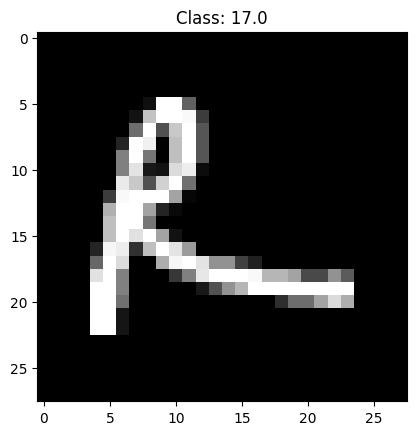

In [ ]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]))

In [ ]:
from tensorflow.keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
digits_data.shape

(70000, 28, 28)

Text(0.5, 1.0, 'Class: 9')

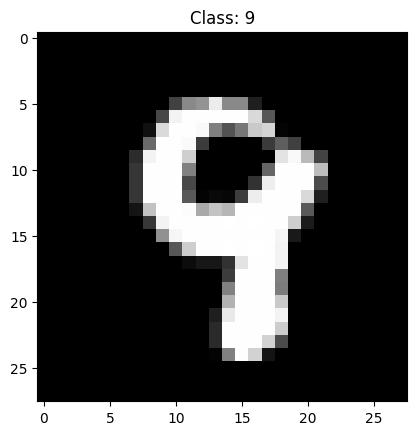

In [ ]:
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

In [ ]:
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
alphabet_labels += 10
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Combine
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
data = np.array(data, dtype = 'float32')

In [ ]:
data = np.expand_dims(data, axis=-1)

In [ ]:
data.shape

(442450, 28, 28, 1)

In [ ]:
data /= 255.0

# Enconde the labels
le = LabelBinarizer()
labels = le.fit_transform(labels)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

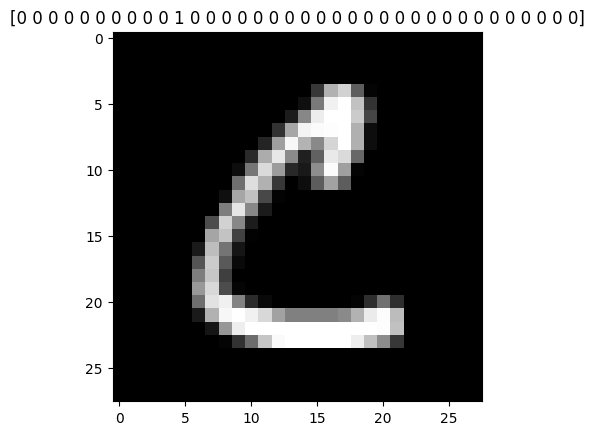

In [ ]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

#create data augmentation
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# output
model.add(Dense(36, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
joblib.dump(name_labels, "labels.pkl")

['labels.pkl']

In [ ]:
a = joblib.load("labels.pkl")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
file_model = 'manual_ocr.model'
epochs = 5
batch_size = 128

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

# Fit the model
history = model.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/5
2765/2765 [==============================] - ETA: 0s - loss: 2.1967 - accuracy: 0.8243
Epoch 1: val_loss improved from inf to 0.26433, saving model to manual_ocr.model
2765/2765 [==============================] - 153s 53ms/step - loss: 2.1967 - accuracy: 0.8243 - val_loss: 0.2643 - val_accuracy: 0.8891
Epoch 2/5
2765/2765 [==============================] - ETA: 0s - loss: 1.0020 - accuracy: 0.8992
Epoch 2: val_loss improved from 0.26433 to 0.20054, saving model to manual_ocr.model
2765/2765 [==============================] - 147s 53ms/step - loss: 1.0020 - accuracy: 0.8992 - val_loss: 0.2005 - val_accuracy: 0.9209
Epoch 3/5
2765/2765 [==============================] - ETA: 0s - loss: 0.8327 - accuracy: 0.9117
Epoch 3: val_loss did not improve from 0.20054
2765/2765 [==============================] - 148s 53ms/step - loss: 0.8327 - accuracy: 0.9117 - val_loss: 0.2127 - val_accuracy: 0.9139
Epoch 4/5
2765/2765 [==============================] - ETA: 0s - loss: 0.7512 - accuracy

In [ ]:
# make a prediction
predictions = model.predict(X_test, batch_size=batch_size)

# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

692/692 [==============================] - 2s 3ms/step


array([6.49097620e-09, 1.30874900e-09, 9.96474014e-10, 1.38015355e-06,
       1.21044401e-08, 1.26554295e-02, 2.46436921e-05, 2.54601353e-12,
       2.09403652e-06, 2.67931373e-05, 5.61209499e-13, 8.46619608e-10,
       3.86346926e-07, 7.48912654e-10, 1.65701053e-08, 1.23093891e-09,
       1.37366544e-04, 1.60018093e-11, 5.30079453e-12, 2.54535871e-06,
       2.59389710e-09, 6.14550117e-06, 6.86045795e-12, 2.24981769e-11,
       2.02372821e-08, 3.67486069e-10, 2.28790249e-08, 1.83624939e-13,
       9.87142861e-01, 3.32117583e-10, 2.21480362e-10, 1.31174654e-11,
       9.26524524e-10, 5.34174213e-14, 2.59174811e-07, 4.74866146e-10],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
name_labels[np.argmax(predictions[10])]

'S'

In [ ]:
name_labels[np.argmax(predictions[10])]

'S'

In [ ]:
# check prediction
np.argmax(y_test[10]) == np.argmax(predictions[10])

True

In [ ]:
model.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.2059 - accuracy: 0.9099


[0.20588217675685883, 0.90993332862854]

In [ ]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.19      0.90      0.31      1381
           1       0.96      0.99      0.98      1575
           2       0.85      0.98      0.91      1398
           3       0.99      0.97      0.98      1428
           4       0.85      0.97      0.91      1365
           5       0.72      0.92      0.81      1263
           6       0.92      0.98      0.95      1375
           7       0.97      0.98      0.98      1459
           8       0.95      0.99      0.97      1365
           9       0.96      0.98      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.97      0.98      1734
           C       1.00      0.96      0.98      4682
           D       0.93      0.96      0.94      2027
           E       0.99      0.98      0.99      2288
           F       0.91      1.00      0.95       233
           G       0.81      0.96      0.88      1152
           H       0.97    

In [ ]:
model.save('model', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
save_path="/content/drive/MyDrive/PCVK/ocr_cust"
model.save(save_path)

##Recognition

In [ ]:
import cv2
import numpy as np
import imutils
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

In [ ]:
pat="/content/drive/MyDrive/Export/image_11.jpg"

In [ ]:
pat=cv2.imread(pat)

In [ ]:
img=pat

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
blur = cv2.GaussianBlur(gray, (3,3), 0)

In [ ]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)

In [ ]:
invertion = 255 - adaptive


In [ ]:
erode = cv2.erode(invertion, np.ones((1,1)))

In [ ]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

In [ ]:
conts = find_contours(erode.copy())

In [ ]:
len(conts)

59876

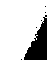

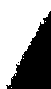

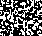

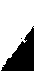

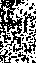

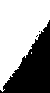

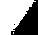

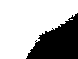

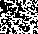

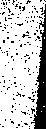

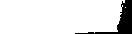

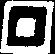

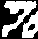

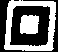

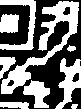

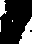

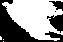

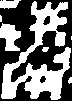

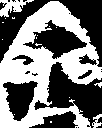

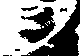

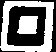

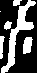

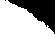

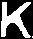

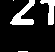

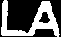

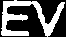

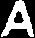

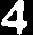

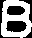

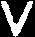

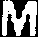

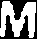

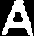

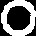

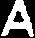

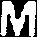

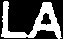

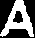

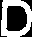

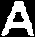

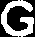

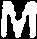

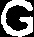

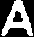

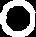

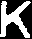

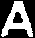

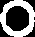

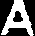

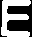

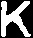

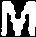

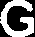

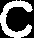

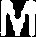

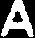

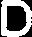

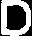

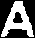

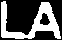

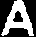

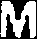

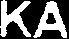

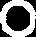

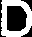

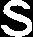

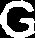

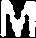

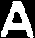

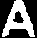

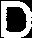

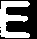

In [ ]:
min_w, max_w = 30, 160
min_h, max_h = 34, 140
img_copy = img.copy()
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w]
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh)

    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

In [ ]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y+h, x - margin:x + w + margin]
  return roi

def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  print(thresh)
  return thresh

def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

[[  0 255   0 ... 255   0 255]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ... 255   0   0]
 ...
 [255   0 255 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]]


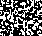

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

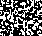

In [ ]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 30, 160
  min_h, max_h = 34, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[255 255   0 ...   0   0   0]
 [255 255   0 ... 255 255   0]
 [255 255   0 ... 255 255 255]
 ...
 [  0 255 255 ...   0   0 255]
 [255 255 255 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255   0]
 [255 255   0 ... 255 255   0]
 [255 255 255 ...   0   0   0]]


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255   0 ...   0   0   0]
 [255 255   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]


[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[255 255   0 ...   0 255   0]
 [  0   0   0 ...   0 255   0]
 [  0   0 255 ...   0 255   0]
 ...
 [255 255 255 ... 255 255 255]
 [255   0 255 ... 255 255 255]
 [255   0   0 ...   0 255 255]]


[[255 255 255 ... 255   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ... 255   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[  0 255 255 ... 255   0   0]
 [  0 255 255 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [255   0 255 ...   0   0   0]]


[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0 255 255]
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0 255 255]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0 255]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[255   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0   0]]


[[  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [255   0 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[255   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255 255]]


[[255   0 255 ... 255   0 255]
 [255 255 255 ...   0   0 255]
 [255 255 255 ...   0   0 255]
 ...
 [255 255   0 ... 255   0 255]
 [255 255   0 ... 255   0 255]
 [255 255 255 ... 255   0 255]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0 255 255]]


[[  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ... 255   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
detected_char[0][1]

(23, 1201, 51, 62)

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/custom_ocr.model')

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
# Predict
preds = model.predict(pixels)

3/3 [==============================] - 0s 24ms/step


In [ ]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

N V R P B P T P B H B T G Z B B B M V Z B B B K L B K E D 4 W A 4 B V M N A 0 E A M 4 N A D A G N E M G A 0 K A 0 A N N E R K M S C M A D D N A 4 N U A N M 0 D S N G N A A N D E 

In [ ]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)

In [ ]:
output_path = '/content/drive/MyDrive/DetectedExport/'

# Pastikan path output ada atau buat jika belum ada
if not os.path.exists(output_path):
    os.makedirs(output_path)

filename = 'image_1.jpg'  # Ganti dengan nama file yang sesuai
filepath = os.path.join(output_path, filename)
cv2.imwrite(filepath, img_copy2)


True

## ERROR

In [ ]:
def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sort_contours(conts, method='left-to-right')[0]

    return conts

In [ ]:
def extract_roi(img, margin=2):
    roi = img[y - margin:y+h, x - margin:x + w + margin]
    return roi

In [ ]:
def thresholding(img):
    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    print(thresh)
    return thresh

In [ ]:
def resize_img(img, w, h):
    if w > h:
        resized = imutils.resize(img, width=28)
    else:
        resized = imutils.resize(img, height=28)

    # (w, h) = resized.shape
    (h, w) = resized.shape

    # Calculate how many pixels need to fill char image
    dX = int(max(0, 28 - w) / 2.0)
    dY = int(max(0, 28 - h) / 2.0)

    filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
    filled = cv2.resize(filled, (28,28))

    return filled


In [ ]:
def normalization(img):
    img = img.astype('float32') / 255.0 # convert to floating point
    img = np.expand_dims(img, axis=-1) # add depth
    return img

In [ ]:
def process_box(gray, x, y, w, h):

    roi = extract_roi(gray)
    thresh = thresholding(roi)
    (h, w) = thresh.shape
    resized = resize_img(thresh, w, h)

    normalized = normalization(resized)

    return (normalized, (x, y, w, h))


In [ ]:
def rcon(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)
    invertion = 255 - adaptive
    erode = cv2.erode(invertion, np.ones((1,1)))
    conts = find_contours(erode.copy())

    min_w, max_w = 30, 160
    min_h, max_h = 34, 140
    img_copy = img.copy() # original image for plotting countour result
    filtered_conts = []

    for c in conts:
        (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
        if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
            filtered_conts.append(c)
            roi = gray[y:y+h, x:x+w] # get region of interest for char
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] # check

            # Build bounding box on original image
            cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

    detected_char = []

    for c in conts:
        (x, y, w, h ) = cv2.boundingRect(c)

        min_w, max_w = 30, 160
        min_h, max_h = 34, 140

        if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
            detected_char.append(process_box(gray, x, y, w, h))

    detected_char[0][1]

    pixels = np.array([px[0] for px in detected_char], dtype='float32')

    # Get all box for detected char
    boxes = [box[1] for box in detected_char]

    model = load_model('/content/drive/MyDrive/custom_ocr.model')

    digits = '0123456789'
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
    char_list = digits + letters
    char_list = [ch for ch in char_list]

    preds = model.predict(pixels)

    for p in preds:
        char_idx = np.argmax(p)
        print(char_list[char_idx], end = " ")

    img_copy2 = img.copy()

    for(pred, (x, y, w, h)) in zip(preds, boxes):
        i = np.argmax(pred)
        char_detected = char_list[i]

        cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
    cv2_imshow(img_copy)
    return img_copy2

In [ ]:
def mainRcon(path):
    image=cv2.imread(path)
    im=rcon(image)

In [ ]:
mainRcon('/content/drive/MyDrive/Export/image_10.jpg')